# Customer Clustering

https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

1.	FRESH: annual spending (m.u.) on fresh products (Continuous)
2.	MILK: annual spending (m.u.) on milk products (Continuous)
3.	GROCERY: annual spending (m.u.)on grocery products (Continuous)
4.	FROZEN: annual spending (m.u.)on frozen products (Continuous) 
5.	DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
6.	DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous)
7.	CHANNEL: customer™ Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal) 
8.	REGION: customers™ Region -  Lisnon, Oporto or Other (Nominal)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation, metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [2]:
# read .csv from provided dataset
csv_filename="Wholesale customers data.csv"

# df=pd.read_csv(csv_filename,index_col=0)
df=pd.read_csv(csv_filename)

In [5]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
features = df.columns[2:]
features

Index([u'Fresh', u'Milk', u'Grocery', u'Frozen', u'Detergents_Paper',
       u'Delicassen'],
      dtype='object')

In [7]:
X = df[features]
y = df['Region']

In [8]:
X.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [9]:
# split dataset to 60% training and 40% testing
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)

In [10]:
print X_train.shape, y_train.shape

(264, 6) (264L,)


# Unsupervised Learning

## PCA

In [11]:
y.unique()

array([3, 1, 2], dtype=int64)

In [12]:
len(features)

6

In [13]:
# Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(X)

# Print the components and the amount of variance in the data contained in each dimension
print(pca.components_)
print(pca.explained_variance_ratio_)

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


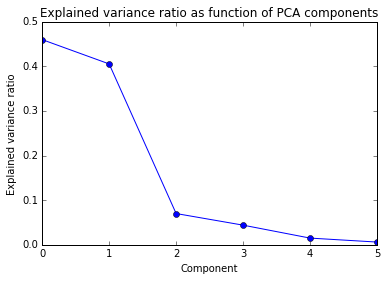

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(list(pca.explained_variance_ratio_),'-o')
plt.title('Explained variance ratio as function of PCA components')
plt.ylabel('Explained variance ratio')
plt.xlabel('Component')
plt.show()

## Applying PCA to visualize high-dimensional data

In [22]:
X = df[features].values
y= df['Region'].values
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X)

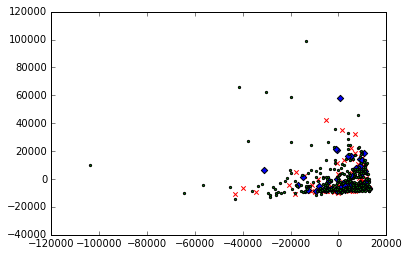

In [23]:
red_x, red_y = [], []
blue_x, blue_y = [], []
green_x, green_y = [], []

for i in range(len(reduced_X)):
    if y[i] == 1:
        red_x.append(reduced_X[i][0])
        red_y.append(reduced_X[i][1])
    elif y[i] == 2:
        blue_x.append(reduced_X[i][0])
        blue_y.append(reduced_X[i][1])
    else:
        green_x.append(reduced_X[i][0])
        green_y.append(reduced_X[i][1])

plt.scatter(red_x, red_y, c='r', marker='x')
plt.scatter(blue_x, blue_y, c='b', marker='D')
plt.scatter(green_x, green_y, c='g', marker='.')
plt.show()

## Clustering

In [24]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [52]:
# First we reduce the data to two dimensions using PCA to capture variation
pca = PCA(n_components=2)
X = pca.fit_transform(X)
print(X[:10])  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [53]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(reduced_data)

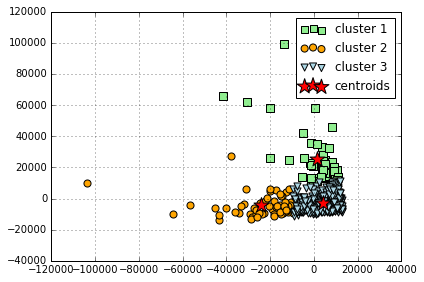

In [54]:
plt.scatter(X[y_km==0,0], 
            X[y_km==0,1], 
            s=50, 
            c='lightgreen', 
            marker='s', 
            label='cluster 1')
plt.scatter(X[y_km==1,0], 
            X[y_km==1,1], 
            s=50, 
            c='orange', 
            marker='o', 
            label='cluster 2')
plt.scatter(X[y_km==2,0], 
            X[y_km==2,1], 
            s=50, 
            c='lightblue', 
            marker='v', 
            label='cluster 3')
plt.scatter(km.cluster_centers_[:,0], 
            km.cluster_centers_[:,1], 
            s=250, 
            marker='*', 
            c='red', 
            label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig('./figures/centroids.png', dpi=300)
plt.show()

In [47]:
# First we reduce the data to two dimensions using PCA to capture variation
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)
print(reduced_data[:10])  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [26]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit(reduced_data)
print(clusters)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [27]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [28]:
# Find the centroids for KMeans or the cluster means for GMM 

centroids = kmeans.cluster_centers_
print('*** K MEANS CENTROIDS ***')
print(centroids)

# TRANSFORM DATA BACK TO ORIGINAL SPACE FOR ANSWERING 7
print('*** CENTROIDS TRANSFERED TO ORIGINAL SPACE ***')
print(pca.inverse_transform(centroids))

*** K MEANS CENTROIDS ***
[[  4114.95375632  -3081.03219608]
 [-24220.71188261  -4364.45560022]
 [  1339.44615464  25546.49074629]]
*** CENTROIDS TRANSFERED TO ORIGINAL SPACE ***
[[  8322.69861907   3708.39600392   5342.26451174   2502.64602205
    1784.86331733   1068.7598276 ]
 [ 36135.48457282   6480.2347537    6104.73878363   6844.02904962
    1116.07889738   2925.29532792]
 [  7866.48334584  18810.88144467  27401.85716757   2389.52905546
   12224.37174037   2891.82145432]]


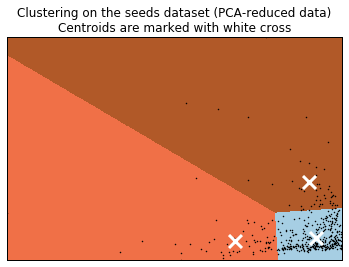

In [29]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the seeds dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

### Elbow Method

In [55]:
X = df[features]
y = df['Region']

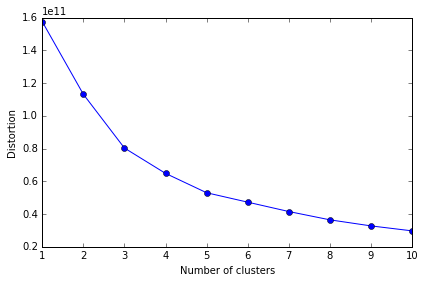

In [30]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions .append(km.inertia_)
plt.plot(range(1,11), distortions , marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('./figures/elbow.png', dpi=300)
plt.show()

## Quantifying the quality of clustering via silhouette plots

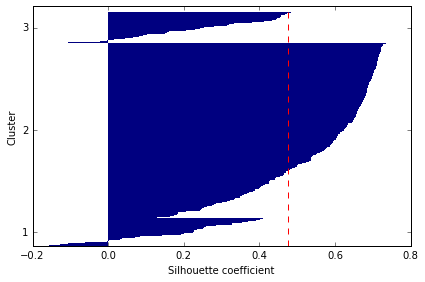

In [31]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
            edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

Our clustering with 3 centroids is good.

### Applying agglomerative clustering via scikit-learn

In [33]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


___

In [34]:
from sklearn.cross_validation import train_test_split
X = df[features]
y = df['Region']
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.25, random_state=42)

### K Means

In [35]:
from sklearn import cluster
clf = cluster.KMeans(init='k-means++', n_clusters=3, random_state=5)
clf.fit(X_train)
print clf.labels_.shape
print clf.labels_

(330L,)
[1 1 2 2 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 2 2 1 2 2 2 1 1 1 2 1 1 1 1 0
 1 0 1 1 1 2 1 1 1 1 1 1 2 1 2 1 1 2 1 1 1 2 1 1 2 2 1 1 1 0 1 1 1 1 1 1 1
 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 0 1 1 1 0 1 1 1 2 1 1 0 1 1 1 1 0 1 2 1 1 2
 1 2 1 1 1 1 2 0 2 2 1 1 2 1 1 0 1 1 1 2 1 1 2 0 1 1 1 2 2 1 1 1 1 1 1 2 1
 2 1 1 2 1 1 1 1 1 1 2 2 1 2 1 1 1 2 1 1 1 1 1 1 2 0 2 0 2 1 1 2 1 0 1 2 2
 1 1 1 1 2 1 2 1 2 1 1 2 1 1 2 1 1 1 2 1 1 0 1 1 1 0 0 2 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 2 2 1 0 1 2 1 1 1 1 1 2 0 1 2 1 1 1 0 1 1 2 2 1 2 1
 1 1 1 0 1 1 1 1 1 1 1 2 1 1 2 2 1 1 2 2 1 2 2 1 1 2 0 1 2 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 2 1]


In [36]:
# Predict clusters on testing data
y_pred = clf.predict(X_test)

In [37]:
from sklearn import metrics
print "Addjusted rand score:{:.2}".format(metrics.adjusted_rand_score(y_test, y_pred))
print "Homogeneity score:{:.2} ".format(metrics.homogeneity_score(y_test, y_pred)) 
print "Completeness score: {:.2} ".format(metrics.completeness_score(y_test, y_pred))
print "Confusion matrix"
print metrics.confusion_matrix(y_test, y_pred)

Addjusted rand score:-0.023
Homogeneity score:0.028 
Completeness score: 0.022 
Confusion matrix
[[ 0  0  0  0]
 [ 0  9  1  0]
 [ 1  5  2  0]
 [ 3 66 23  0]]


### Affinity Propogation

In [38]:
# Affinity propagation
aff = cluster.AffinityPropagation()
aff.fit(X_train)
print aff.cluster_centers_indices_.shape

(33L,)


In [39]:
y_pred = aff.predict(X_test)

In [40]:
from sklearn import metrics
print "Addjusted rand score:{:.2}".format(metrics.adjusted_rand_score(y_test, y_pred))
print "Homogeneity score:{:.2} ".format(metrics.homogeneity_score(y_test, y_pred)) 
print "Completeness score: {:.2} ".format(metrics.completeness_score(y_test, y_pred))
print "Confusion matrix"
print metrics.confusion_matrix(y_test, y_pred)

Addjusted rand score:-0.001
Homogeneity score:0.26 
Completeness score: 0.052 
Confusion matrix
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  1  2  0  0  0  2  0  0  0  0  0  0  1  0  1  1  1]
 [ 1  0  0  0  1  0  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  1  2]
 [ 3  0  3  0  4  9  5 10  1  1  2 13  4  4  9  1  2  4  5  3  2  2  5]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0

## MeanShift

In [41]:
ms = cluster.MeanShift()
ms.fit(X_train)
print ms.cluster_centers_

[[  8.11076522e+03   3.49355217e+03   4.81676522e+03   2.34956087e+03
    1.67056522e+03   1.07935217e+03]
 [  1.82850000e+04   1.19360000e+04   3.25175000e+04   2.39500000e+02
    1.37160000e+04   3.14850000e+03]
 [  2.63730000e+04   3.64230000e+04   2.20190000e+04   5.15400000e+03
    4.33700000e+03   1.65230000e+04]
 [  1.61170000e+04   4.61970000e+04   9.27800000e+04   1.02600000e+03
    4.08270000e+04   2.94400000e+03]
 [  2.29250000e+04   7.34980000e+04   3.21140000e+04   9.87000000e+02
    2.00700000e+04   9.03000000e+02]
 [  8.56500000e+03   4.98000000e+03   6.72980000e+04   1.31000000e+02
    3.81020000e+04   1.21500000e+03]
 [  7.62370000e+04   3.47300000e+03   7.10200000e+03   1.65380000e+04
    7.78000000e+02   9.18000000e+02]
 [  1.82910000e+04   1.26600000e+03   2.10420000e+04   5.37300000e+03
    4.17300000e+03   1.44720000e+04]
 [  3.68470000e+04   4.39500000e+04   2.01700000e+04   3.65340000e+04
    2.39000000e+02   4.79430000e+04]
 [  8.50000000e+01   2.09590000e+04  

In [42]:
y_pred = ms.predict(X_test)

In [43]:
from sklearn import metrics
print "Addjusted rand score:{:.2}".format(metrics.adjusted_rand_score(y_test, y_pred))
print "Homogeneity score:{:.2} ".format(metrics.homogeneity_score(y_test, y_pred)) 
print "Completeness score: {:.2} ".format(metrics.completeness_score(y_test, y_pred))
print "Confusion matrix"
print metrics.confusion_matrix(y_test, y_pred)

Addjusted rand score:0.035
Homogeneity score:0.1 
Completeness score: 0.1 
Confusion matrix
[[ 0  0  0  0  0  0  0]
 [10  0  0  0  0  0  0]
 [ 5  3  0  0  0  0  0]
 [80  3  0  0  4  4  1]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]]


### Mixture of Guassian Models

In [44]:
from sklearn import mixture

# Define a heldout dataset to estimate covariance type
X_train_heldout, X_test_heldout, y_train_heldout, y_test_heldout = train_test_split(
        X_train, y_train,test_size=0.25, random_state=42)
for covariance_type in ['spherical','tied','diag','full']:
    gm=mixture.GMM(n_components=3, covariance_type=covariance_type, random_state=42, n_init=5)
    gm.fit(X_train_heldout)
    y_pred=gm.predict(X_test_heldout)
    print "Adjusted rand score for covariance={}:{:.2}".format(covariance_type, 
                                                               metrics.adjusted_rand_score(y_test_heldout, y_pred))


Adjusted rand score for covariance=spherical:-0.016
Adjusted rand score for covariance=tied:-0.08
Adjusted rand score for covariance=diag:0.029
Adjusted rand score for covariance=full:0.055


In [45]:
gm = mixture.GMM(n_components=3, covariance_type='tied', random_state=42)
gm.fit(X_train)

GMM(covariance_type='tied', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=100, params='wmc', random_state=42,
  thresh=None, tol=0.001, verbose=0)

In [46]:
# Print train clustering and confusion matrix
y_pred = gm.predict(X_test)
print "Addjusted rand score:{:.2}".format(metrics.adjusted_rand_score(y_test, y_pred))
print "Homogeneity score:{:.2} ".format(metrics.homogeneity_score(y_test, y_pred)) 
print "Completeness score: {:.2} ".format(metrics.completeness_score(y_test, y_pred))

print "Confusion matrix"
print metrics.confusion_matrix(y_test, y_pred)

Addjusted rand score:-0.044
Homogeneity score:0.015 
Completeness score: 0.025 
Confusion matrix
[[ 0  0  0  0]
 [ 0  9  1  0]
 [ 0  8  0  0]
 [ 1 83  8  0]]


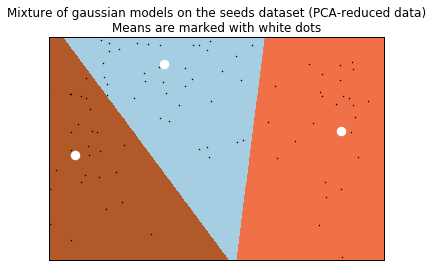

In [115]:
pl=plt
from sklearn import decomposition
# In this case the seeding of the centers is deterministic,
# hence we run the kmeans algorithm only once with n_init=1

pca = decomposition.PCA(n_components=2).fit(X_train)
reduced_X_train = pca.transform(X_train)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will asign a color to each
x_min, x_max = reduced_X_train[:, 0].min() + 1, reduced_X_train[:, 0].max() - 1
y_min, y_max = reduced_X_train[:, 1].min() + 1, reduced_X_train[:, 1].max() - 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

gm.fit(reduced_X_train)
#print np.c_[xx.ravel(),yy.ravel()]
Z = gm.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
pl.figure(1)
pl.clf()
pl.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=pl.cm.Paired,
          aspect='auto', origin='lower')
#print reduced_X_train.shape

pl.plot(reduced_X_train[:, 0], reduced_X_train[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = gm.means_

pl.scatter(centroids[:, 0], centroids[:, 1],
           marker='.', s=169, linewidths=3,
           color='w', zorder=10)

pl.title('Mixture of gaussian models on the seeds dataset (PCA-reduced data)\n'
         'Means are marked with white dots')
pl.xlim(x_min, x_max)
pl.ylim(y_min, y_max)
pl.xticks(())
pl.yticks(())
pl.show()

___

In [69]:
X = df[features].values
y= df['Region'].values
pca = PCA(n_components=2)
X = pca.fit_transform(X)

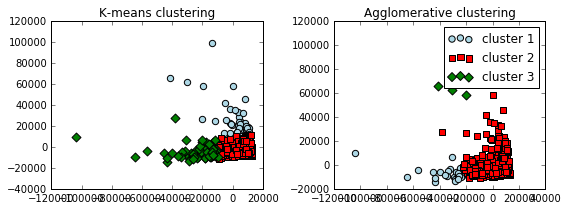

In [70]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))

km = KMeans(n_clusters=3, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km==0,0], X[y_km==0,1], c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km==1,0], X[y_km==1,1], c='red', marker='s', s=40, label='cluster 2')
ax1.scatter(X[y_km==2,0], X[y_km==2,1], c='green', marker='D', s=40, label='cluster 3')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac==0,0], X[y_ac==0,1], c='lightblue', marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac==1,0], X[y_ac==1,1], c='red', marker='s', s=40, label='cluster 2')
ax2.scatter(X[y_ac==2,0], X[y_ac==2,1], c='green', marker='D', s=40, label='cluster 3')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
#plt.savefig('./figures/kmeans_and_ac.png', dpi=300)
plt.show()

____